<a href="https://colab.research.google.com/github/MANUPAL4321/assignment1-deep-learning/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions

In [ ]:
def act(x):
    return np.tanh(x)

In [ ]:
def act_deriv(x):
    return 1 - np.tanh(x)**2

# Data

In [ ]:
np.random.seed(50)
x = np.linspace(-10, 10, 25).reshape(-1, 1)
y = np.exp(-np.sin(x**2)/2) + x

# Split train/test

In [ ]:
indices = np.random.permutation(len(x))
train_idx, test_idx = indices[:20], indices[20:]
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# give weights

In [ ]:
w1 = np.random.randn(5, 1)
b1 = np.zeros((5, 1))
w2 = np.random.randn(5, 5)
b2 = np.zeros((5, 1))
w3 = np.random.randn(1, 5)
b3 = np.zeros((1, 1))

learning_rate = 0.02
epochs = 10000
losses = []

# Training

In [ ]:
losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for xi, yi in zip(x_train, y_train):
        xi = xi.reshape(-1, 1)
        yi = yi.reshape(-1, 1)

        # Forward pass
        z1 = np.dot(w1, xi) + b1
        a1 = act(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = act(z2)
        z3 = np.dot(w3, a2) + b3
        y_hat = z3

        # Loss (convert to scalar)
        epoch_loss += ((y_hat - yi)**2).item()

        # Backward pass
        dJ_dyhat = 2 * (y_hat - yi)
        delta3 = dJ_dyhat
        delta2 = np.dot(w3.T, delta3) * act_deriv(z2)
        delta1 = np.dot(w2.T, delta2) * act_deriv(z1)

        # Gradients
        dw3 = np.dot(delta3, a2.T)
        db3 = delta3
        dw2 = np.dot(delta2, a1.T)
        db2 = delta2
        dw1 = np.dot(delta1, xi.T)
        db1 = delta1

        # Update weights
        w3 -= learning_rate * dw3
        b3 -= learning_rate * db3
        w2 -= learning_rate * dw2
        b2 -= learning_rate * db2
        w1 -= learning_rate * dw1
        b1 -= learning_rate * db1

    losses.append(epoch_loss / len(x_train))


# Plot loss

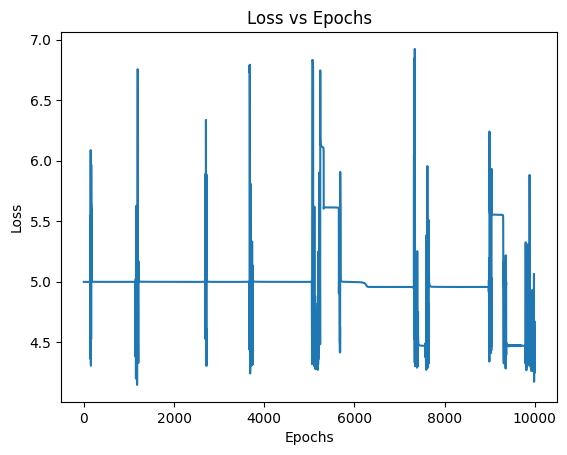

In [ ]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

# Prediction

In [ ]:
y_pred = []
for xi in x:
    xi = xi.reshape(-1, 1)
    z1 = np.dot(w1, xi) + b1
    a1 = act(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = act(z2)
    z3 = np.dot(w3, a2) + b3
    y_pred.append(z3.item())

y_pred = np.array(y_pred)

# Plot results

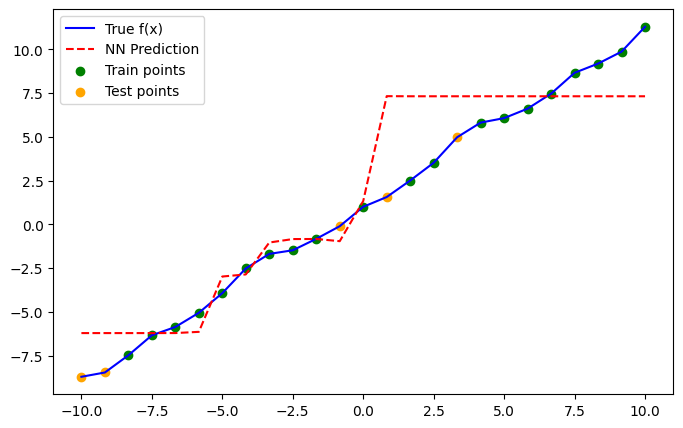

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(x.flatten(), y.flatten(), label="True f(x)", color="blue")
plt.plot(x.flatten(), y_pred, label="NN Prediction", color="red", linestyle="--")
plt.scatter(x_train.flatten(), y_train.flatten(), label="Train points", color="green")
plt.scatter(x_test.flatten(), y_test.flatten(), label="Test points", color="orange")
plt.legend()
plt.show()

# Errors

In [ ]:
train_rmse = np.sqrt(np.mean((y_pred[train_idx] - y_train.flatten())**2))
test_rmse = np.sqrt(np.mean((y_pred[test_idx] - y_test.flatten())**2))

train_error_pct = (train_rmse / np.mean(np.abs(y_train))) * 100
test_error_pct = (test_rmse / np.mean(np.abs(y_test))) * 100

print(f"Training Error (% of average value): {train_error_pct:.2f}%")
print(f"Test Error (% of average value): {test_error_pct:.2f}%")


Training Error (% of average value): 35.99%
Test Error (% of average value): 66.86%
